# Sample Rate Conversion

Resources:
1. Proakis 2013 Digital Signal Processing - chapter 11
2. Lyons 2004 Understanding Digital Signal Processing - chapter 10
3. https://www.earlevel.com/main/category/digital-audio/sample-rate-conversion/

In [1]:
from numpy import *
from matplotlib.pyplot import *
from scipy import signal

In [2]:
f = 5

Fx = 100
Tx = 1/Fx

t_x = arange(100)/Fx
x = sin(2*pi*f*t_x)

(0, 0.4)

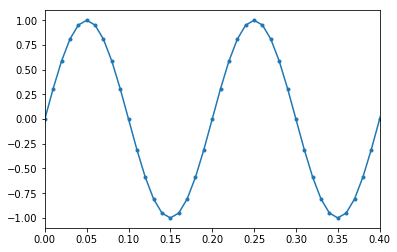

In [108]:
fig, ax = subplots(1, 1)
ax.plot(t_x, x, ".-")
ax.set_xlim(0, 2/f)

In [109]:
def upsample(x, I):
    y = zeros(len(x) * I)
    for m in range(len(y)):
        if (m % I) == 0:
            y[m] = x[m//I]
        else:
            y[m] = 0
    return y

def downsample(x, D):
    y = zeros(len(x)//D)
    for m in range(len(y)):
        y[m] = x[m*D]
    return y

## Interpolation/Upsampling

(0, 0.2)

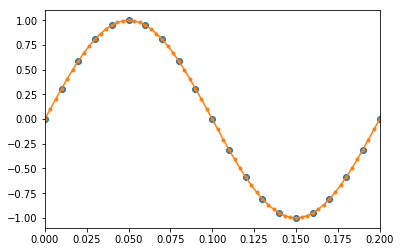

In [110]:
I = 3

# y
Fy = Fx*I
Ty = 1/Fy
y = zeros(int(len(x) * I))
t_y = arange(len(y))/Fy

# v
Fv = Fy
Tv = Ty
v = y.copy()
t_v = t_y.copy()

v = upsample(x, I)

# Apply low-pass filter
b = signal.firwin(20, 0.8/I)
y = signal.filtfilt(b, [1.0], v)*I

# Align in time
fig, ax = subplots(1,1)
ax.plot(t_x, x, "o")
ax.plot(t_y, y, ".-")
ax.set_xlim(0, 1/f)

# Decimation/Downsampling

(0, 0.2)

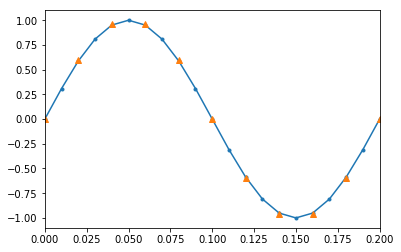

In [111]:
D = 2

Fv = Fx
Tv = Tx
v = zeros(len(x))
t_v = t_x.copy()

Fy = Fx//D
Ty = 1/Fx
y = zeros(len(x)//D)
t_y = arange(len(y))/Fy

# Apply low-pass filter
b = signal.firwin(20, 0.8/D)
v = signal.filtfilt(b, [1.0], x)

# Downsample signal by removing samples
y = downsample(v, D)
        
fig, ax = subplots(1,1)
ax.plot(t_x, x, ".-")
ax.plot(t_y, y, "^")
ax.set_xlim(0, 1/f)

## Combined Interpolator and Decimator

Filter cutoff = _min(1/I, 1/D)_

(0, 0.2)

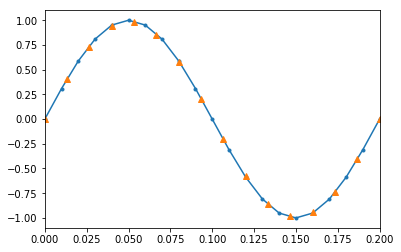

In [112]:
I = 3
D = 4

v = upsample(x, I)

b = signal.firwin(20, 0.8*min([1/I, 1/D]))
w = signal.filtfilt(b, [1.0], v) * I

y = downsample(w, D)

t_vw = arange(len(v))/(Fx*I)
t_y = arange(len(y))/(Fx*I/D)

fig, ax = subplots(1, 1)
ax.plot(t_x, x, ".-")
#ax.plot(t_vw, v, ".-")
#ax.plot(t_vw, w, ".-")
ax.plot(t_y, y, "^")
ax.set_xlim(0, 1/f)

## Polyphase rational sample-rate converter

- Lyons 2011 Understanding Digital Signal Processing, Section 10.10--10.11

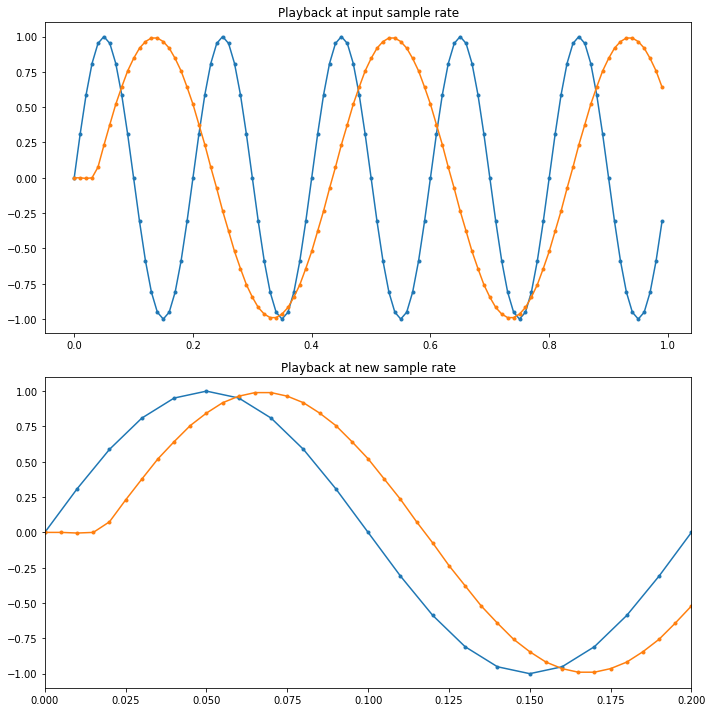

In [3]:
L = 2 # Interpolation rate
M = 1 # Decimation rate
N = 4 # Sub-filter length

# Prototype filter for combined anti-aliasing and reconstruction.
h = signal.firwin(N*L, 0.8*min([1/L, 1/M]))

y = zeros((L*len(x))//M)
for m in range(0, len(y)):
    n = (m*M) // L
    k = (m*M) % L
    
    for l in range(N):
        # Skip unknown input samples
        if n-l < 0:
            continue
        
        y[m] += h[l*L + k] * x[n - l]

# Compensate for change in amplitude
y *= L
t_y = arange(len(y))/(L*Fx/M)

fig, (ax1, ax2) = subplots(2, 1, figsize=[10, 10])

ax1.plot(t_x, x, ".-")
ax1.plot(t_x, y[:len(x)], ".-")
ax1.set_title("Playback at input sample rate")

ax2.plot(t_x, x, ".-")
ax2.plot(t_y, y, ".-")
ax2.set_title("Playback at new sample rate")
ax2.set_xlim(0, 1/f)

fig.tight_layout()